<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/proc_imagens_tarefa_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

In [38]:
def mostrar_2(imagem_1, legenda_1, imagem_2, legenda_2):

  plt.figure(figsize=(10, 5))

  # Imagem 1
  plt.subplot(1, 2, 1)
  plt.imshow(imagem_1, cmap='gray')
  plt.title(legenda_1)
  plt.axis("off")

  # Imagem 2
  plt.subplot(1, 2, 2)
  plt.imshow(imagem_2, cmap='gray')
  plt.title(legenda_2)
  plt.axis("off")

  plt.show()

In [41]:
# Atividade 1 – Geradores de Ruído - letra A

def adicionar_ruido_gaussiano(imagem, media, variancia):

    # Verifica a imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return

    imagem_norm = imagem.astype(np.float32) / 255.0 # Converte a imagem para float32 [0,1]
    sigma = np.sqrt(variancia) # Calcula o desvio padrão
    ruido = np.random.normal(media, sigma, imagem_norm.shape) # Gera o ruído gaussiano
    imagem_ruidosa = imagem_norm + ruido # Adiciona o ruído
    imagem_ruidosa = np.clip(imagem_ruidosa, 0, 1) # Mantém os valores no intervalo [0,1]
    legenda_imagem = "Imagem com Ruído Gaussiano"

    imagem_final = (imagem_ruidosa * 255).astype(np.uint8) # Converte de volta para uint8 [0,255]

    return imagem_final, legenda_imagem

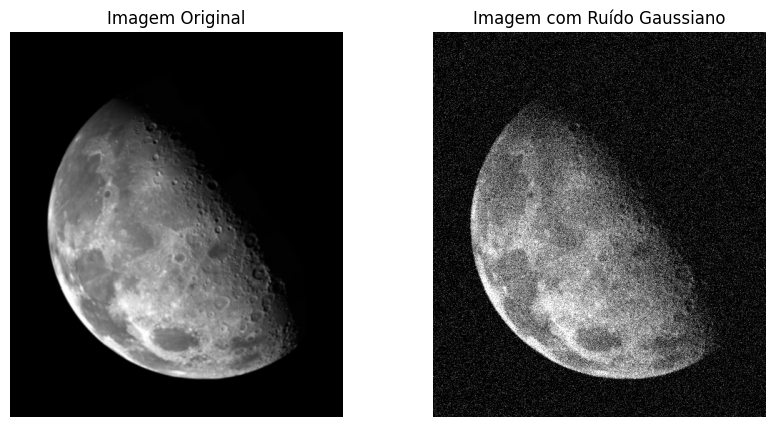

In [44]:
caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~4.TIF'

imagem_ori = cv2.imread(caminho_imgagem, cv2.COLOR_BGR2GRAY)
legenda = "Imagem Original"

media = 0
variancia = 0.02

imagem_com_ruido , legenda_ruido = adicionar_ruido_gaussiano(imagem_ori, media, variancia)

mostrar_2(imagem_ori, legenda , imagem_com_ruido, legenda_ruido)

In [46]:
# Atividade 1 – Geradores de Ruído - letra B

def adicionar_ruido_sal_pimenta(imagem, p_sal, p_pimenta):

    # Verifica a imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return

    # Verifica probabilidades
    if p_sal < 0 or p_pimenta < 0 or p_sal + p_pimenta > 1:
        print("Erro: As probabilidades devem ser >= 0 e p_sal + p_pimenta <= 1.")
        return

    # Normaliza imagem para [0,1]
    imagem_norm = imagem.astype(np.float32) / 255.0

    # Gera matriz uniforme (0 a 1)
    r = np.random.rand(*imagem_norm.shape)

    # Cria cópia para receber o ruído
    imagem_ruidosa = imagem_norm.copy()

    # Aplica SAL (pixels brancos)
    imagem_ruidosa[r < p_sal] = 1.0

    # Aplica PIMENTA (pixels pretos)
    imagem_ruidosa[(r >= p_sal) & (r < p_sal + p_pimenta)] = 0.0

    # Recorta valores só por segurança
    imagem_ruidosa = np.clip(imagem_ruidosa, 0, 1)

    legenda_imagem = f"Imagem com Ruído Sal e Pimenta (p_sal={p_sal}, p_pimenta={p_pimenta})"

    # Converte de volta para uint8 [0,255]
    imagem_final = (imagem_ruidosa * 255).astype(np.uint8)

    return imagem_final, legenda_imagem

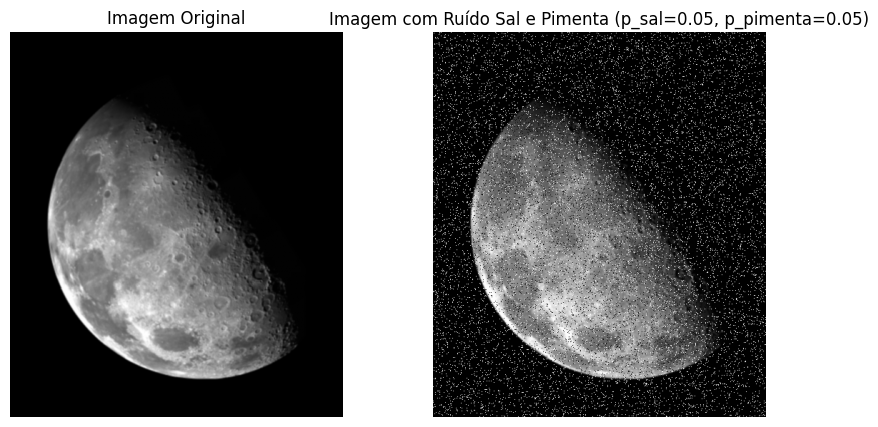

In [51]:
caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~4.TIF'

imagem_ori = cv2.imread(caminho_imgagem, cv2.IMREAD_GRAYSCALE)
legenda = "Imagem Original"

p_sal = 0.05       # 5% sal
p_pimenta = 0.05   # 5% pimenta

imagem_com_ruido, legenda_ruido = adicionar_ruido_sal_pimenta(imagem_ori, p_sal, p_pimenta)

mostrar_2(imagem_ori, legenda, imagem_com_ruido, legenda_ruido)


In [55]:
def mostrar_imagem_e_histograma(imagem, titulo_imagem):

    # Verifica a imagem
    if imagem is None:
        print("Erro: Não foi possível carregar a imagem.")
        return

    titulo_hist= f"Histograma da {titulo_imagem}"

    # Calcula histograma (1 canal, 256 níveis de cinza)
    hist = cv2.calcHist([imagem], [0], None, [256], [0, 256]).ravel()

    # Plotagem
    plt.figure(figsize=(12, 5))

    # Exibe a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(imagem, cmap="gray")
    plt.title(titulo_imagem)
    plt.axis("off")

    # Exibe o histograma
    plt.subplot(1, 2, 2)
    plt.plot(hist, color='black')
    plt.title(titulo_hist)
    plt.xlabel("Intensidade (0–255)")
    plt.ylabel("Frequência")
    plt.xlim([0, 255])

    plt.show()

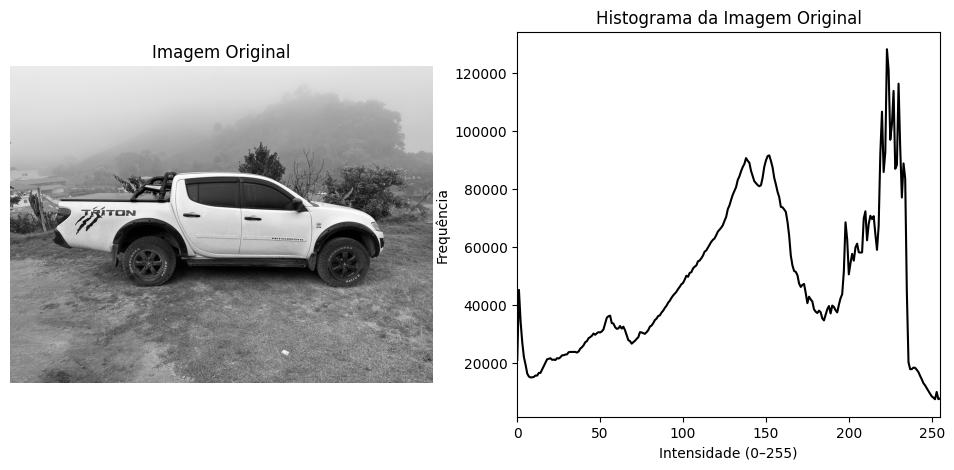

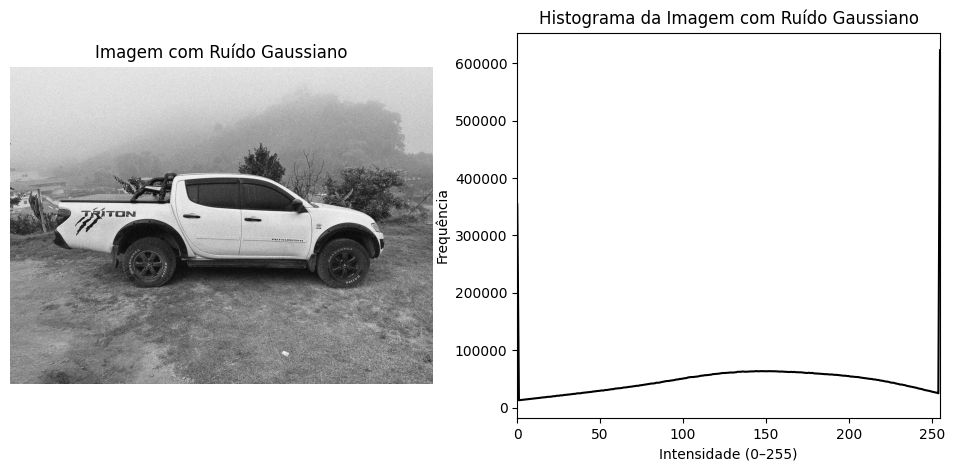

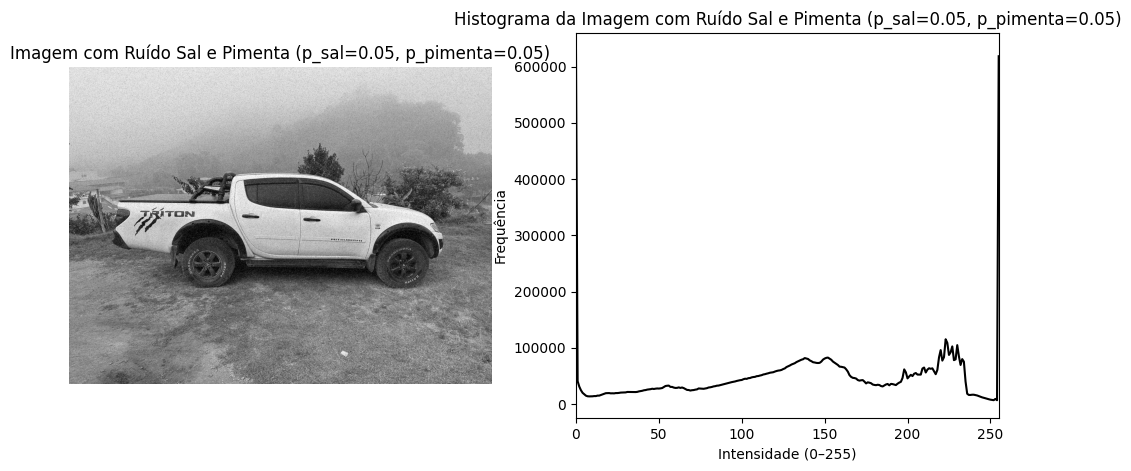

In [66]:
# Atividade 1 – Geradores de Ruído - letra B

caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'

imagem_ori = cv2.imread(caminho_imgagem, cv2.IMREAD_GRAYSCALE)
legenda = "Imagem Original"

media = 0
variancia = 0.02

imagem_com_ruido_g , legenda_ruido_g = adicionar_ruido_gaussiano(imagem_ori, media, variancia)

p_sal = 0.05       # 5% sal
p_pimenta = 0.05   # 5% pimenta

imagem_com_ruido_sp, legenda_ruido_sp = adicionar_ruido_sal_pimenta(imagem_ori, p_sal, p_pimenta)

mostrar_imagem_e_histograma(imagem_ori, legenda)

mostrar_imagem_e_histograma(imagem_com_ruido_g, legenda_ruido_g)

mostrar_imagem_e_histograma(imagem_com_ruido_sp, legenda_ruido_sp)

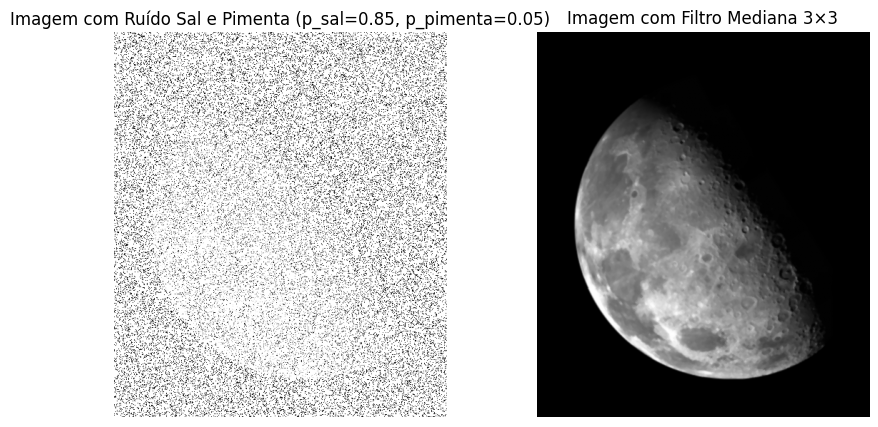

In [72]:
# Atividade 2 – Redução de Ruído Usando um Filtro Mediano - letra A e B

caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~4.TIF'

imagem_ori = cv2.imread(caminho_imgagem, cv2.IMREAD_GRAYSCALE)
legenda = "Imagem Original"

p_sal = 0.85       # 5% sal
p_pimenta = 0.05   # 5% pimenta

imagem_com_ruido, legenda_ruido = adicionar_ruido_sal_pimenta(imagem_ori, p_sal, p_pimenta)

imagem_filtrada = cv2.medianBlur(imagem_ori, 3)

legenda_filtrada = "Imagem com Filtro Mediana 3×3"

mostrar_2(imagem_com_ruido, legenda_ruido, imagem_filtrada, legenda_filtrada)

In [65]:
print(imagem_com_ruido_g.shape)

(3024, 4032)


In [19]:
print(imagem_com_ruido)


None
